# Hafsa ESSAOURI

# Prediction Using Unsupervised ML

## 1. import libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 2. Dataset

In [78]:
#reading data
df = pd.read_csv('iris.csv')
#print the first 10 rows
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [79]:
df.shape

(150, 6)

#### 150 rows × 6 columns



## 3. Finding the optimum number of clusters for k-means classification 'Elbow Method'

In [80]:
#remove data we don't need (column 0 and 5)
df = df.iloc[:, [1, 2, 3,4]].values
#Elbow method
# Inertia : Inertia simply computes the squared distance of each sample in a cluster to its cluster center and sums them up.
inert = [] #inertia
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inert.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 4. Plotting the results 

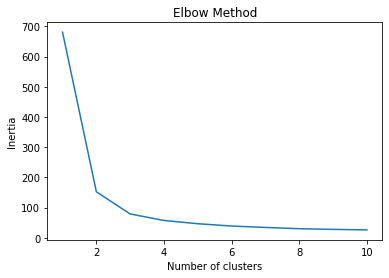

In [81]:
plt.plot(range(1,11), inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### So, the optimum number of clusters is 3


## 5. Applying kmeans to the dataset



In [95]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## 6. Visualising kmeans to the dataset

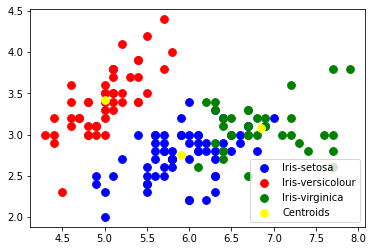

In [98]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 60, c = 'blue', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 60, c = 'red', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
clusters = kmeans.cluster_centers_
plt.scatter(clusters[:, 0], clusters[:,1], s = 60, c = 'yellow', label = 'Centroids')
plt.legend()